In [2]:
import brightway2 as bw
import bw2io
import productivity_boosters as prbs

from project_path import ROOT_DIR
from pprint import pprint
import pandas as pd

# from dataclasses import dataclass

# import bw2data

# import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pathlib import Path
from os import mkdir

import openpyxl as xl
import textwrap
from matplotlib.ticker import (
    MultipleLocator,
    # ScalarFormatter,
    FixedLocator,
    # FixedFormatter,
    # NullFormatter,
)

plt.style.use("default")


In [3]:
bw.projects

Brightway2 projects manager with 14 objects:
	GAC_project
	SsbD_case_studies
	aachen_fast_calculations
	check_PBsmethod
	default
	double_count_electricity
	geminal_atom_catalysts
	geminal_atom_catalysts_v2
	premise_scenarios_ei35
	premisified_scenarios
	premisified_scenarios_cars
	supply chain graph
	test
	trial-SimaPro-import-DME-trucks
Use `projects.report()` to get a report on all projects.

In [4]:
bw.projects.set_current("GAC_project")
bw.databases

Databases dictionary with 3 object(s):
	GAC_project_db
	biosphere3
	ei39cutoff

In [5]:
ipcc_methods = [
    met
    for met in bw.methods
    if "ipcc 2021" in str(met).lower()
    and "climate change: including SLCFs" in str(met)
    and "no LT" not in str(met)
    and "GWP100" in str(met)
    or ("ipcc 2013" in str(met).lower() and "no LT" not in str(met) and "GWP100" in str(met))
    # or ("ipcc 2021" in str(met).lower() and "no LT" not in str(met) and "GWP100" in str(met))
][1]# [:2]
ipcc_methods


('IPCC 2021',
 'climate change: including SLCFs',
 'global warming potential (GWP100)')

In [6]:
DB_NAME = "GAC_project_db"

In [7]:
act = [
    ds
    for ds in bw.Database(DB_NAME)
    # if "Cu/PCN" in ds["name"]
    # if "Cu2O/Altman-Buchwald-ligand" in ds["name"]
    if "1-(naphthalen-1-yl)-1H-imidazole" in ds["name"] and "Cu/PCN" in ds["name"]
    # if "1-(naphthalen-1-yl)-1H-imidazole" in ds["name"]
    # and "Cu2O/Altman-Buchwald-ligand" in ds["name"]
][0]
act

'1-(naphthalen-1-yl)-1H-imidazole production with heterogeneous Cu/PCN catalyst (10.8 wt% Cu)' (kilogram, GLO, None)

In [8]:
hetero_system = [
    ds
    for ds in bw.Database(DB_NAME)
    if "1-(naphthalen-1-yl)-1H-imidazole" in ds["name"] and "Cu/PCN" in ds["name"]
][0]
hetero_system

'1-(naphthalen-1-yl)-1H-imidazole production with heterogeneous Cu/PCN catalyst (10.8 wt% Cu)' (kilogram, GLO, None)

In [9]:
homoge_system = [
    ds
    for ds in bw.Database(DB_NAME)
    if "1-(naphthalen-1-yl)-1H-imidazole" in ds["name"]
    and "Cu2O/Altman-Buchwald-ligand" in ds["name"]
][0]
homoge_system

'1-(naphthalen-1-yl)-1H-imidazole production with homogeneous Cu2O/Altman-Buchwald-ligand catalytic complex' (kilogram, GLO, None)

In [10]:
bw.calculation_setups

CalculationSetups dictionary with 5 object(s):
	catalysts_only
	contrib
	solveLCA
	solveLCA_scenarios
	trial

In [11]:
result = prbs.pretty_lca(FUs=[{hetero_system: 1}, {homoge_system: 1}], methods=[ipcc_methods], setup_name="solveLCA")

Duration: 0:00:00.968985


In [12]:
result

,database,activity name,reference product,unit,location,IPCC 2021 - climate change: including SLCFs - global warming potential (GWP100) (kg CO2-Eq)
0,GAC_project_db,1-(naphthalen-1-yl)-1H-imidazole production wi...,1-(naphthalen-1-yl)-1H-imidazole,kilogram,GLO,5.609766
1,GAC_project_db,1-(naphthalen-1-yl)-1H-imidazole production wi...,1-(naphthalen-1-yl)-1H-imidazole,kilogram,GLO,70.332673


In [13]:
result_plot = result.iloc[:,[1, 5]]
result_plot["activity name"] = result_plot["activity name"].replace({result_plot["activity name"][0]: "heterogeneous", result_plot["activity name"][1]: "homogeneous"})
result_plot

C:\Users\vtulus\AppData\Local\Temp\ipykernel_3456\1628839750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_plot["activity name"] = result_plot["activity name"].replace({result_plot["activity name"][0]: "heterogeneous", result_plot["activity name"][1]: "homogeneous"})


,activity name,IPCC 2021 - climate change: including SLCFs - global warming potential (GWP100) (kg CO2-Eq)
0,heterogeneous,5.609766
1,homogeneous,70.332673


In [14]:
pngFilesDir = Path(ROOT_DIR, r"data/interim/png_files") # full path to folder w/png files
svgFilesDir = Path(ROOT_DIR, r"data/interim/svg_files") # full path to folder w/svg files

# Generate required folders if needed
if not Path.exists(pngFilesDir):
    mkdir(pngFilesDir)
if not Path.exists(svgFilesDir):
    mkdir(svgFilesDir)

Preliminary colors:<br>

<b style="background-color: #ef8a62;">heterogeneous</b><br>  
<b style="background-color: #67a9cf;">homogeneous</b><br>



In [15]:
## BAR CHART colors

allcolors = {
    "heterogeneous": "#ef8a62",
    "homogeneous": "#67a9cf",
}


In [16]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(y)):
        plt.text(i, x[i], x[i], ha = 'center')

C:\Users\vtulus\AppData\Local\Temp\ipykernel_3456\315537017.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(result_plot["activity name"], rotation=-90, va="center")


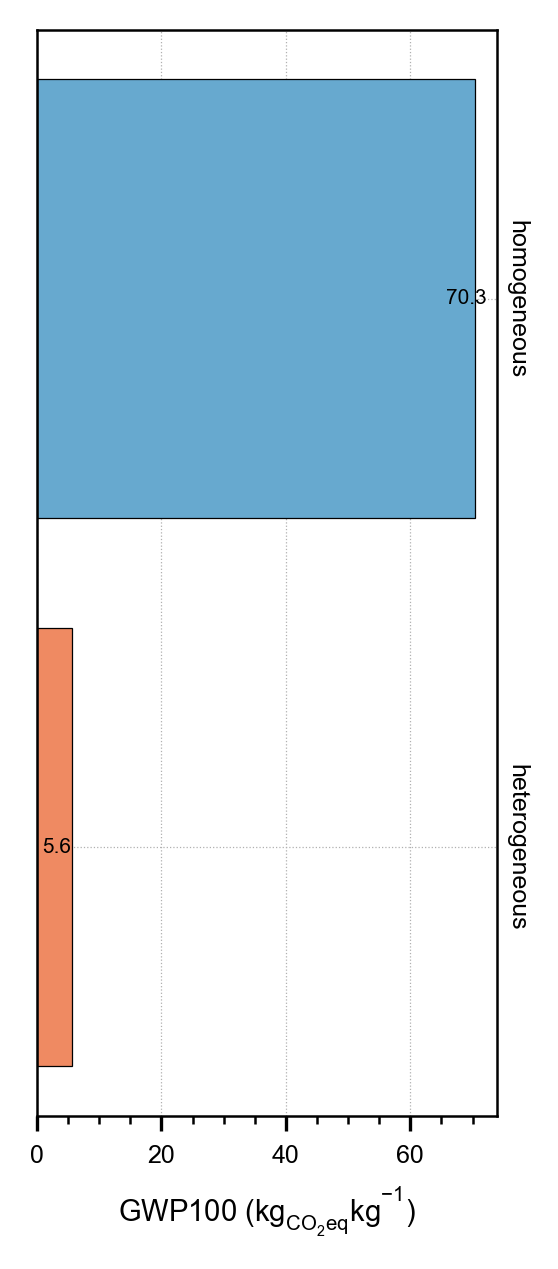

In [20]:
# Plot

# Figure specifications (fonts, sizes, figsize, etc.)
size_legend_font = 8
size_tick_font = 6
size_label_font = 7
mpl.rc("xtick", labelsize=size_tick_font)
mpl.rc("ytick", labelsize=size_tick_font)
mpl.rc("axes", labelsize=size_label_font, linewidth=0.6)
mpl.rc("font", family="Arial")
# mpl.rc('text', usetex=True) # no LaTex on this machine
mpl.rc("mathtext", default="regular")
# mpl.rc('lines', )
# mpl.rc('markers', )
marker_style = dict(lw=0, marker="D", ms=1.5, mec="r", mfc="none", mew=0.7)

# Size of the figure
size_in_mm = (50, 110)  # input the desired size in mm (width, height)
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=[x / 25.4 for x in size_in_mm],
    dpi=300,
    sharey=True,
    # tight_layout = {'pad': 0}
)

## BAR CHART ################################################################
height = 0.8  # the height of the bars (thickness)
bars = ax.barh(
    y=result_plot.iloc[:, 0],
    width=result_plot.iloc[:, 1],
    height=height,
    color=[v for v in allcolors.values()],
    edgecolor="k",
    linewidth=0.3,
)

ax.bar_label(bars, fmt="%.1f", padding=-7, fontsize=5)

ax.yaxis.set_ticklabels(result_plot["activity name"], rotation=-90, va="center")
ax.tick_params(axis='y', which='major', length=0.001, pad=-118) # almost invisible, pad = separation of text from axis

ax.set_xlabel("GWP100 ($kg_{CO_{2}eq} kg^{-1}$)")
ax.grid(True)
ax.xaxis.grid(True, ls=':', lw=0.3)
ax.yaxis.grid(True, ls=':', lw=0.3)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_axisbelow(True)

# # LEGEND
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels,
#            frameon=True, loc='upper left',
#            bbox_to_anchor=(0.06, 0.12),
#            ncol=4,
#            fontsize=size_legend_font)

fig.tight_layout()

figNamePNG = 'impact_comparison.png'
figNameSVG = 'impact_comparison.svg'

plt.savefig(str(pngFilesDir/figNamePNG)) # export fig as png
plt.savefig(str(svgFilesDir/figNameSVG)) # export fig as svg


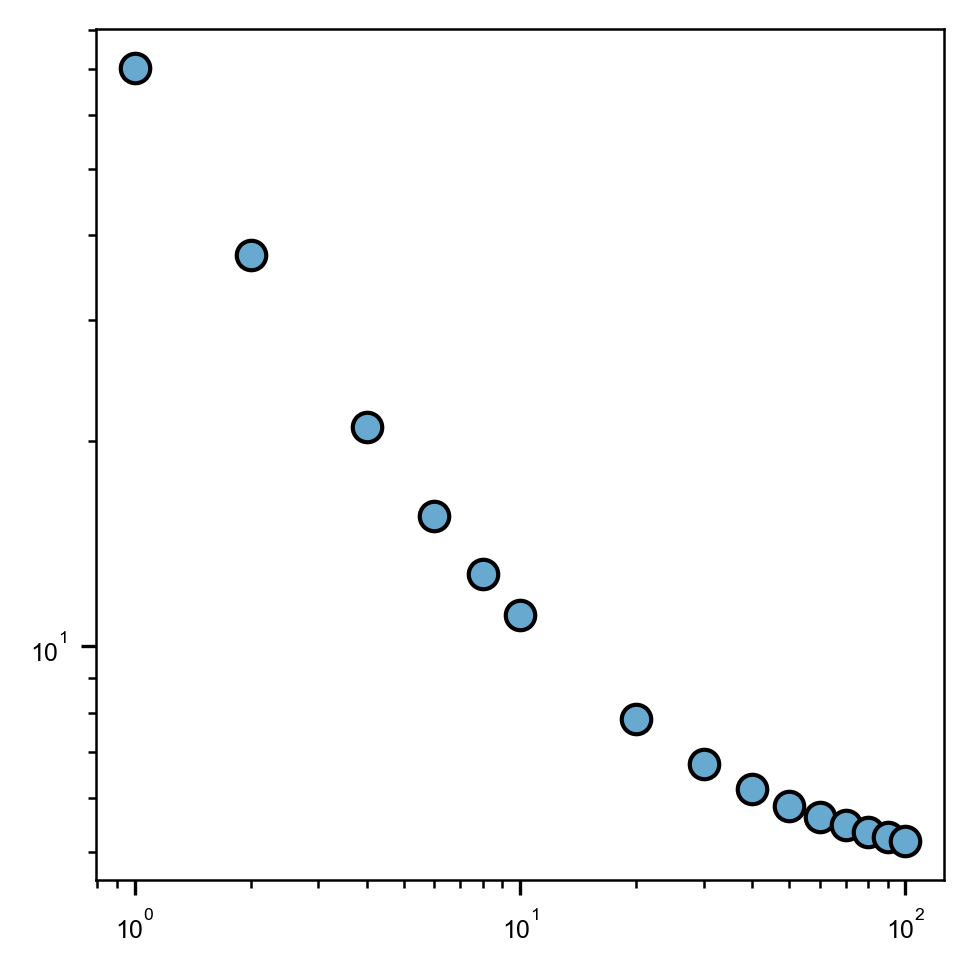

In [27]:
# Plot

# Figure specifications (fonts, sizes, figsize, etc.)
size_legend_font = 8
size_tick_font = 6
size_label_font = 7
mpl.rc("xtick", labelsize=size_tick_font)
mpl.rc("ytick", labelsize=size_tick_font)
mpl.rc("axes", labelsize=size_label_font, linewidth=0.6)
mpl.rc("font", family="Arial")
# mpl.rc('text', usetex=True) # no LaTex on this machine
mpl.rc("mathtext", default="regular")
# mpl.rc('lines', )
# mpl.rc('markers', )
marker_style = dict(lw=0, marker="D", ms=1.5, mec="r", mfc="none", mew=0.7)

# Size of the figure
size_in_mm = (85, 85)  # input the desired size in mm (width, height)
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=[x / 25.4 for x in size_in_mm],
    dpi=300,
    sharey=True,
    # tight_layout = {'pad': 0}
)

## Scatter plot ################################################################
x = [1,2,4,6,8,10,20,30,40,50,60,70,80,90,100]
y1 = [70.33267286,37.43079022,20.9798489,15.4962018,12.75437825,11.10928411,7.819095849,6.722366428,6.174001718,5.844982891,5.625637007,5.468961375,5.351454652,5.260060533,5.186945238]
y2 = 

ax.scatter(x, y, s=50, edgecolors="k", color=[v for v in allcolors.values()][1])
ax.set_yscale("log")
ax.set_xscale("log")
# height = 0.8  # the height of the bars (thickness)
# bars = ax.barh(
#     y=result_plot.iloc[:, 0],
#     width=result_plot.iloc[:, 1],
#     height=height,
#     color=[v for v in allcolors.values()],
#     edgecolor="k",
#     linewidth=0.3,
# )

# ax.bar_label(bars, fmt="%.1f", padding=-7, fontsize=5)

# ax.yaxis.set_ticklabels(result_plot["activity name"], rotation=-90, va="center")
# ax.tick_params(axis='y', which='major', length=0.001, pad=-118) # almost invisible, pad = separation of text from axis

# ax.set_xlabel("GWP100 ($kg_{CO_{2}eq} kg^{-1}$)")
# ax.grid(True)
# ax.xaxis.grid(True, ls=':', lw=0.3)
# ax.yaxis.grid(True, ls=':', lw=0.3)
# ax.xaxis.set_minor_locator(MultipleLocator(5))
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.set_axisbelow(True)

# # LEGEND
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels,
#            frameon=True, loc='upper left',
#            bbox_to_anchor=(0.06, 0.12),
#            ncol=4,
#            fontsize=size_legend_font)

fig.tight_layout()

# figNamePNG = 'impact_comparison.png'
# figNameSVG = 'impact_comparison.svg'

# plt.savefig(str(pngFilesDir/figNamePNG)) # export fig as png
# plt.savefig(str(svgFilesDir/figNameSVG)) # export fig as svg
